<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day18_Handwriting_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This project is about creating a tool that can recognize handwritten text and convert it to digital text**

**Core Concept**

The core AI concept here is Optical Character Recognition (OCR) specifically for handwritten text, which is more challenging than printed text recognition.

**What Is It?**

Handwriting recognition is like teaching a computer to "***read***" handwritten text, just like humans do. When you see someone's handwriting, your brain processes the shapes and recognizes them as letters and words. We're teaching computers to do the same thing.

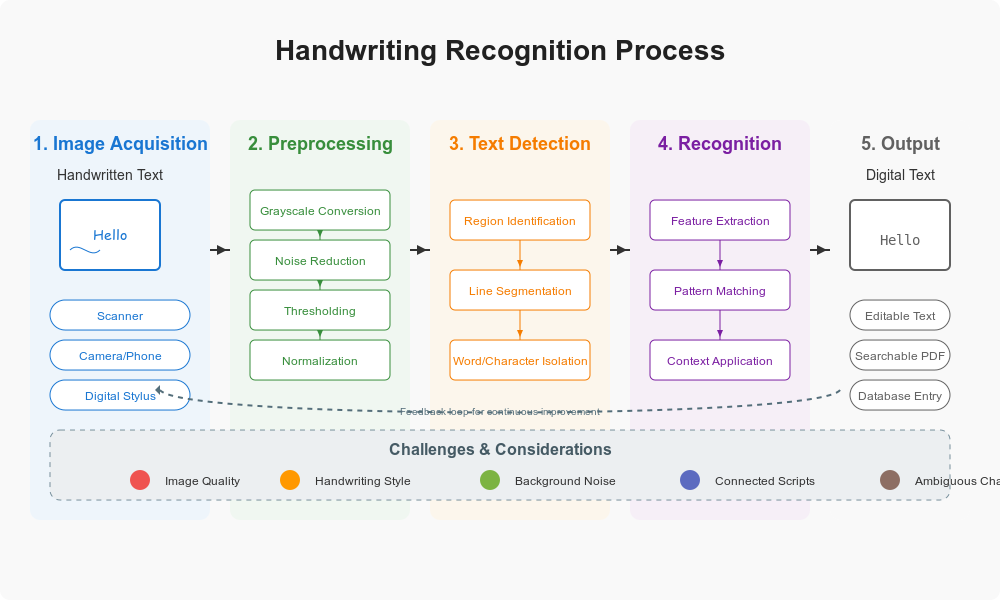

**Install necessary libraries**

In [1]:
# Install required packages
!pip install pytesseract
!pip install opencv-python
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y libtesseract-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,659 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,718 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-s

**Import the libraries**

In [2]:
# Import necessary libraries
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

**Upload a handwritten image**

In [3]:
# Code to upload an image
from google.colab import files
uploaded = files.upload()  # This will show an upload button

# Get the filename of the uploaded image
filename = next(iter(uploaded))
print(f"Uploaded image: {filename}")

Saving WhatsApp Image 2025-05-02 at 7.52.05 PM.jpeg to WhatsApp Image 2025-05-02 at 7.52.05 PM.jpeg
Uploaded image: WhatsApp Image 2025-05-02 at 7.52.05 PM.jpeg


**Load and display the image**

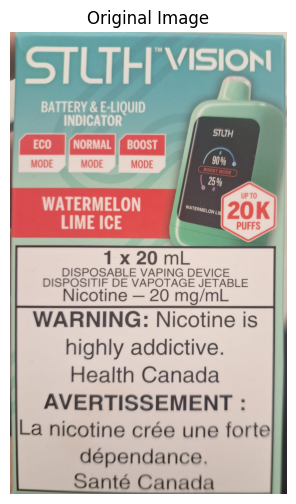

In [4]:
# Read the image
image = cv2.imread(filename)

# Convert from BGR to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

**Preprocess the image**

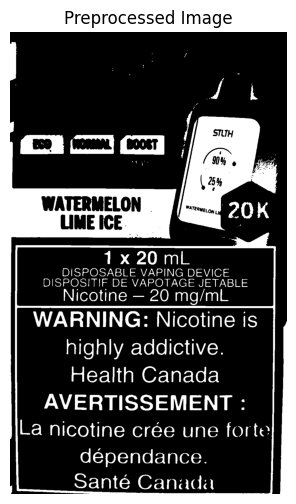

In [5]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
# Adjust the threshold value (127) if needed
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Optional: Apply some noise reduction
binary = cv2.medianBlur(binary, 3)

# Display the preprocessed image
plt.figure(figsize=(10, 6))
plt.imshow(binary, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

**Perform OCR (text recognition)**

In [6]:
 # Set Tesseract configuration
custom_config = r'--oem 3 --psm 6'

# Perform OCR on the binary image
text = pytesseract.image_to_string(binary, config=custom_config)

# Print the recognized text
print("Recognized Text:")
print(text)

Recognized Text:
| re ae
ee Temfon =
ee) 3, per
(3% a
WATERMELON =f»... /
LIMEICE cans
DISPOSABLE VAPING DEVICE
DISPOSITIF DE VAPOTAGE JETABLE
Nicotine — 20 mg/mL
highly addictive.
Health Canada
AVERTISSEMENT :
La nicotine crée une forte
dependance.
| Santé Canada



**Visualize the detected text regions**

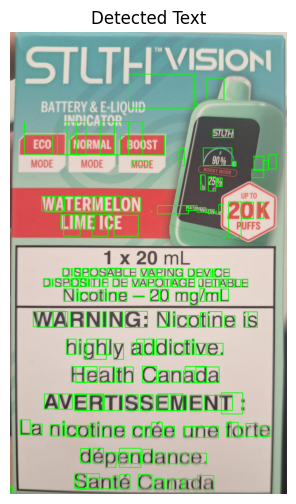

In [7]:
# Get information about detected text
boxes = pytesseract.image_to_boxes(binary, config=custom_config)

# Create a copy of the original image to draw on
result_img = image_rgb.copy()
h, w, _ = result_img.shape

# Draw boxes around detected characters
for box in boxes.splitlines():
    box = box.split()
    if len(box) >= 6:
        char, x1, y1, x2, y2 = box[0], int(box[1]), int(box[2]), int(box[3]), int(box[4])
        # Convert coordinates (Tesseract uses bottom-left origin)
        y1 = h - y1
        y2 = h - y2
        # Draw rectangle around character
        cv2.rectangle(result_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(result_img)
plt.title('Detected Text')
plt.axis('off')
plt.show()

**Improve recognition with additional preprocessing techniques**

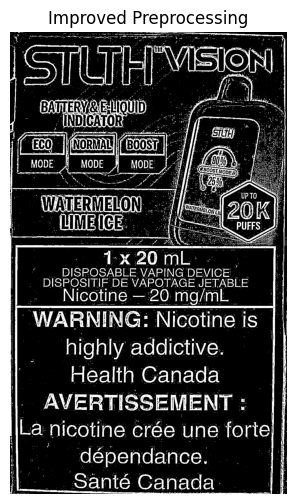

IT.

Nae Net
- te Cy

1c

move } Move | MODE |

a ae
aU ae

OSABLE VAPING DEV

DISP CE
DISPOSITIF DE VAPOTAGE SETABLE
Nicotine — 20 mg/mL


highly addictive.

Health Canada
AVERTISSEMENT :
|La nicotine crée une forte
dépendance.,
Santé Canada

 



In [8]:
# Additional preprocessing for better results
def improve_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )

    # Apply dilation to make text thicker and clearer
    kernel = np.ones((1, 1), np.uint8)
    dilated = cv2.dilate(binary, kernel, iterations=1)

    # Apply erosion to reduce noise
    eroded = cv2.erode(dilated, kernel, iterations=1)

    return eroded

# Process the image with improved techniques
improved_image = improve_image(image)

# Display the improved image
plt.figure(figsize=(10, 6))
plt.imshow(improved_image, cmap='gray')
plt.title('Improved Preprocessing')
plt.axis('off')
plt.show()

# Alternative: Use contours to identify regions of text first
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find likely text regions
for contour in contours:
    if cv2.contourArea(contour) > 500:  # Filter small noise
        x, y, w, h = cv2.boundingRect(contour)
        roi = gray[y:y+h, x:x+w]
        # Process each region individually
        text = pytesseract.image_to_string(roi)
        if text.strip():  # If any text found
            print(text)


**Experiment with different Tesseract settings**

In [9]:
# Alternative for Step 10: Testing selected PSM modes efficiently
from PIL import Image
import time

# Convert to PIL format for better compatibility
pil_image = Image.fromarray(improved_image)

# Choose just the most relevant PSM modes for handwriting
# PSM 6: Assume a single uniform block of text
# PSM 13: Raw line - Treat the image as a single text line
selected_modes = [6, 13]

print("Testing selected PSM modes for best results:")
print("-" * 50)

for mode in selected_modes:
    # Set configuration - using engine mode 1 (LSTM only) for better balance of speed and accuracy
    config = f'--oem 1 --psm {mode}'

    # Track timing
    start = time.time()
    print(f"Processing with PSM mode {mode}...")

    # Process with timeout check
    try:
        # Set a maximum processing time
        text = pytesseract.image_to_string(pil_image, config=config)
        elapsed = time.time() - start

        # Display results
        print(f"✓ Completed in {elapsed:.1f} seconds")
        print(f"Results for PSM {mode}:")
        print("-" * 30)
        print(text if text.strip() else "[No text detected]")
        print("-" * 30)
        print()

    except Exception as e:
        print(f"✗ Failed with error: {str(e)}")
        print()

    # Small pause between processing attempts
    time.sleep(1)

print("PSM mode testing complete.")
print("Tip: For handwriting, PSM 13 often works best for single lines, while PSM 6 works for paragraphs.")

Testing selected PSM modes for best results:
--------------------------------------------------
Processing with PSM mode 6...
✓ Completed in 2.7 seconds
Results for PSM 6:
------------------------------
1 PERVScESE ( ID ; og ep
WATERMELON Ie | Cy ya)
fee || NV1 E81 G Ee Pane Cage
—o aoe Sea wg
? +x 20mL:- ff
“ DISPOSABLE. VAPING DEVICE | . i
|} » DISPOSITIFDE-VAPOTAGEJETABLE |}
|_..__Nicotine-—20 mg/mL}
| WARNING: Nicotine is ||
| highly addictive. i
i Health Canadas |
| AVERTISSEMENT : I
La nicotine crée une forte; |
| . dépendance. —s_ |
i. .Santé Canada. sf

------------------------------

Processing with PSM mode 13...
✓ Completed in 0.6 seconds
Results for PSM 13:
------------------------------
Ss

------------------------------

PSM mode testing complete.
Tip: For handwriting, PSM 13 often works best for single lines, while PSM 6 works for paragraphs.


In [10]:
import concurrent.futures

psm_modes = [6, 7, 8, 10]
results = {}

def ocr_with_psm(mode):
    config = f'--oem 3 --psm {mode}'
    text = pytesseract.image_to_string(improved_image, config=config)
    return mode, text

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(ocr_with_psm, mode) for mode in psm_modes]
    for future in concurrent.futures.as_completed(futures):
        mode, text = future.result()
        results[mode] = text
        print(f"\nPage Segmentation Mode {mode}:")
        print(text)


Page Segmentation Mode 8:
Ss


Page Segmentation Mode 7:
=


Page Segmentation Mode 10:
Ss


Page Segmentation Mode 6:
1 PERVScESE ( ID ; og ep
WATERMELON Ie | Cy ya)
fee || NV1 E81 G Ee Pane Cage
—o aoe Sea wg
? +x 20mL:- ff
“ DISPOSABLE. VAPING DEVICE | . i
|} » DISPOSITIFDE-VAPOTAGEJETABLE |}
|_..__Nicotine-—20 mg/mL}
| WARNING: Nicotine is ||
| highly addictive. i
i Health Canadas |
| AVERTISSEMENT : I
La nicotine crée une forte; |
| . dépendance. —s_ |
i. .Santé Canada. sf



**Save the results**

In [11]:
# Save the recognized text to a file
with open('recognized_text.txt', 'w') as f:
    # Assuming 'results' from the previous cell contains the best OCR output
    # You might need to adjust this if you have a different variable storing the final text
    best_mode = max(results, key=lambda mode: len(results[mode]))  # Get mode with longest text (likely best)
    f.write(results[best_mode])  # Write the text from the best mode to file

# Download the text file
from google.colab import files
files.download('recognized_text.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>